In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import json 
import re 
import pickle
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from keras.layers import Input, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint ,CSVLogger
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, Conv2DTranspose, Concatenate, Input
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow.keras import backend as K
from math import ceil
%matplotlib inline

In [6]:
import os
def load_data_1(image_size=(256,256),to_array=True):
    all_image=[]
    all_mask=[]
    image_path='/kaggle/input/mri-brain-tumor-detection/annotation_data_1/IMAGES'
    mask_path='/kaggle/input/mri-brain-tumor-detection/annotation_data_1/MASKS'
    images_name=os.listdir(image_path)
    for image_name in images_name :
        image=cv.imread(image_path+'/'+image_name,0)
        image=cv.resize(image,image_size)
        image=image/255.0
        image= image.astype(np.float32)
        all_image.append(image)
        image_1=cv.imread(mask_path+'/'+image_name,0)
        image_1=cv.resize(image_1,image_size)
        image_1=image_1/255.0
        image_1= image_1.astype(np.float32)
        all_mask.append(image_1)
    if to_array==True : 
        all_image=np.array(all_image)
        all_mask=np.array(all_mask)
    return all_image,all_mask

x_1,y_1=load_data_1(to_array=False)

In [7]:
print(type(x_1),type(y_1))
print(len(x_1),len(y_1))

<class 'list'> <class 'list'>
797 797


In [9]:
def load_2d_mri(dataset='/kaggle/input/mri-brain-tumor-detection/image_dataset',images='/kaggle/input/mri-brain-tumor-detection/image_dataset/images',
                masks='/kaggle/input/mri-brain-tumor-detection/image_dataset/masks'):
    start_list=['1.png','709.png','922.png','1283.png','1841.png','2344.png']
    stop_list=['210.png','746.png','1033.png','1455.png','2241.png','2402.png']
    length_manage_list=len(stop_list)-1
    all_image_name=os.listdir(images)
    flag=False
    g=0
    lst=[]
    for name in range(1,len(all_image_name)+1) : 
        
        name=f"{name}.png"
        if name==start_list[g]:
            flag=True
#             print(name)
        if flag==True : 
            lst.append(name)
            
        if name==stop_list[g]:
            flag=False
            if length_manage_list!= g : 
                g+=1
    return lst

def load_data_2(image_size=(256,256),to_array=True,image_path='/kaggle/input/mri-brain-tumor-detection/image_dataset/images',
                mask_path='/kaggle/input/mri-brain-tumor-detection/image_dataset/masks'):
    all_image=[]
    all_mask=[]

    images_name=load_2d_mri()


    for image_name in images_name :

        image=cv.imread(image_path+'/'+image_name,0)
        image=cv.resize(image,image_size)
        image=image/255.0
        image= image.astype(np.float32)
        all_image.append(image)
        image_1=cv.imread(mask_path+'/'+image_name,0)

        image_1=cv.resize(image_1,image_size)

        image_1=image_1/255.0
        image_1= image_1.astype(np.float32)
        all_mask.append(image_1)

    if to_array==True : 
        all_image=np.array(all_image)
        all_mask=np.array(all_mask)
    return all_image,all_mask
x_2,y_2=load_data_2(to_array=False)

In [10]:
print(type(x_2),type(y_2))
print(len(x_2),len(y_2))

<class 'list'> <class 'list'>
993 993


In [11]:
# Function to merge data
def merge_data():
    x_final=[]
    y_final=[]
    x_final.extend(x_1)
    x_final.extend(x_2)
    y_final.extend(y_1)
    y_final.extend(y_2)
    x_final=np.array(x_final)
    y_final=np.array(y_final)
    print(x_final.shape,y_final.shape)
    return x_final,y_final

# Merge data
x_final,y_final=merge_data()

(1790, 256, 256) (1790, 256, 256)


In [12]:
def split_data(test_size=0.2,log=True,shuffle=True):  
    x_train, x_test_val, y_train, y_test_val = train_test_split(x_final, y_final, test_size=test_size,shuffle=shuffle)
    if log==True : 
        print('Input: ')
        print(x_final.shape,(y_final).shape)
        print('----------------------------')
        
    x_test=x_test_val[:int(len(x_test_val)*0.5)]
    x_val=x_test_val[int(len(x_test_val)*0.5):]
    y_test=y_test_val[:int(len(y_test_val)*0.5)]
    y_val=y_test_val[int(len(y_test_val)*0.5):]


    x_train=x_train.reshape(-1,256,256,1)
    y_train=y_train.reshape(-1,256,256,1)
    x_test=x_test.reshape(-1,256,256,1)
    y_test=y_test.reshape(-1,256,256,1)
    x_val=x_val.reshape(-1,256,256,1)
    y_val=y_val.reshape(-1,256,256,1)
    if log==True : 
        print('Output: ')
        print(x_train.shape,y_train.shape)
        print(x_test.shape,(y_test).shape)
        print(x_val.shape,y_val.shape)
        print('----------------------------')
    return x_train,y_train,x_test,y_test,x_val,y_val

# Split data
x_train,y_train,x_test,y_test,x_val,y_val=split_data()
validation_dataset=(x_val,y_val)

Input: 
(1790, 256, 256) (1790, 256, 256)
----------------------------
Output: 
(1432, 256, 256, 1) (1432, 256, 256, 1)
(179, 256, 256, 1) (179, 256, 256, 1)
(179, 256, 256, 1) (179, 256, 256, 1)
----------------------------


In [15]:
from keras.layers import Conv2D, BatchNormalization, Activation

def double_conv_block(inputs, num_filters):
    x = Conv2D(num_filters, (3, 3), padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    x = Conv2D(num_filters, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    
    return x


In [16]:
from keras.layers import Add

def build_res_unet_model(num_filters=64, input_shape=(256, 256, 1)):
    inputs = Input(input_shape)
    
    # Encoder
    conv1 = double_conv_block(inputs, num_filters)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = double_conv_block(pool1, num_filters * 2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = double_conv_block(pool2, num_filters * 4)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = double_conv_block(pool3, num_filters * 8)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    
    conv5 = double_conv_block(pool4, num_filters * 16)
    
    # Decoder
    up6 = Conv2DTranspose(num_filters * 8, (2, 2), strides=(2, 2), padding='same')(conv5)
    up6 = concatenate([up6, conv4], axis=3)
    conv6 = double_conv_block(up6, num_filters * 8)
    
    up7 = Conv2DTranspose(num_filters * 4, (2, 2), strides=(2, 2), padding='same')(conv6)
    up7 = concatenate([up7, conv3], axis=3)
    conv7 = double_conv_block(up7, num_filters * 4)
    
    up8 = Conv2DTranspose(num_filters * 2, (2, 2), strides=(2, 2), padding='same')(conv7)
    up8 = concatenate([up8, conv2], axis=3)
    conv8 = double_conv_block(up8, num_filters * 2)
    
    up9 = Conv2DTranspose(num_filters, (2, 2), strides=(2, 2), padding='same')(conv8)
    up9 = concatenate([up9, conv1], axis=3)
    conv9 = double_conv_block(up9, num_filters)
    
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(conv9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

res_unet_model = build_res_unet_model()
res_unet_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        640 │ input_layer_2[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ activation[0][0]  │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ activation_1[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ activation_2[0][… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ activation_3[0][… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │      1,024 │ conv2d_4[0][0]  

 Total params: 31,054,145 (118.46 MB)

 Trainable params: 31,042,369 (118.42 MB)

 Non-trainable params: 11,776 (46.00 KB)

In [17]:
def Dice_Coefficient(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    dice = K.mean((2.0 * intersection + smooth)/(union + smooth), axis=0)
    return dice

def Dice_Loss(y_true, y_pred):
    return 1.0 - Dice_Coefficient(y_true, y_pred)

In [18]:
res_unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
def make_callbacks(csv_path='my_class_log_5.csv'):
    early_stop=EarlyStopping(monitor='val_loss',patience=15,mode='min',restore_best_weights=False)
    csv_logger=CSVLogger(csv_path)
    callbacks =[early_stop,csv_logger]
    return callbacks
callbacks=make_callbacks()

In [20]:
epochs = 100
batch_size = 16

history = res_unet_model.fit(x_train, y_train, 
                             validation_data=(x_val, y_val), 
                             epochs=epochs, 
                             batch_size=batch_size, 
                             callbacks=callbacks)

Epoch 1/100


2024-05-07 19:31:00.571749: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,64,256,256]{3,2,1,0}, f32[16,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-07 19:31:01.760732: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 2.189095357s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,64,256,256]{3,2,1,0}, f32[16,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-07 19:31:04.441837: E external/

89/90 ━━━━━━━━━━━━━━━━━━━━ 0s 841ms/step - accuracy: 0.9429 - loss: 0.2256

2024-05-07 19:34:20.124075: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,256,256]{3,2,1,0}, f32[8,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-07 19:34:20.127333: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.00337685s
Trying algorithm eng0{} for conv (f32[64,64,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,256,256]{3,2,1,0}, f32[8,64,256,256]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-05-07 19:34:21.998710: E external/local

90/90 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.9433 - loss: 0.2240 - val_accuracy: 0.0410 - val_loss: 63.4769
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 875ms/step - accuracy: 0.9671 - loss: 0.1041 - val_accuracy: 0.0880 - val_loss: 8.0431
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 869ms/step - accuracy: 0.9685 - loss: 0.0919 - val_accuracy: 0.1578 - val_loss: 7.0344
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 875ms/step - accuracy: 0.9674 - loss: 0.0883 - val_accuracy: 0.6804 - val_loss: 0.5818
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 876ms/step - accuracy: 0.9709 - loss: 0.0787 - val_accuracy: 0.6920 - val_loss: 1.1867
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 875ms/step - accuracy: 0.9721 - loss: 0.0722 - val_accuracy: 0.9614 - val_loss: 0.1176
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 79s 873ms/step - accuracy: 0.9736 - loss: 0.0669 - val_accuracy: 0.9437 - val_loss: 0.1255
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 82s 875ms/step - accuracy: 0.9746 - loss: 0.0637 - val_accuracy:

In [21]:
print(type(res_unet_model))

<class 'keras.src.models.functional.Functional'>


In [24]:
training_accuracy = history.history['accuracy']

In [25]:
print("Training Accuracy: ",training_accuracy)

Training Accuracy:  [0.9608271718025208, 0.9680966138839722, 0.9684723019599915, 0.9700196981430054, 0.9715595841407776, 0.972787082195282, 0.9740444421768188, 0.9750881791114807, 0.9769887924194336, 0.9763547778129578, 0.9778205156326294, 0.9783053398132324, 0.9792189002037048, 0.9801973104476929, 0.9803606867790222, 0.9808840751647949, 0.9812414050102234, 0.9826939702033997, 0.983156681060791, 0.9834921360015869, 0.9839823842048645, 0.9845572710037231, 0.9845660328865051, 0.9856923818588257, 0.985758364200592, 0.9864962100982666, 0.9868693351745605, 0.9868003129959106, 0.9871971011161804, 0.9877779483795166, 0.9879226088523865, 0.9877959489822388, 0.9880277514457703, 0.9888430237770081, 0.9888781309127808, 0.9889169931411743, 0.9883341193199158, 0.9893313050270081, 0.9895875453948975, 0.9899165630340576, 0.9899855256080627, 0.9896826148033142, 0.9898591041564941, 0.9903221726417542, 0.9905603528022766, 0.9904802441596985, 0.9898529648780823, 0.99031662940979]


In [23]:
Model_loss, Model_accuracy,*anything = res_unet_model.evaluate(x_test,y_test)

print("Testing Accuracy: ",Model_accuracy)
print("Testing Loss",Model_loss)

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 556ms/step - accuracy: 0.9819 - loss: 0.0454
Testing Accuracy:  0.9817954897880554
Testing Loss 0.04847719520330429


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


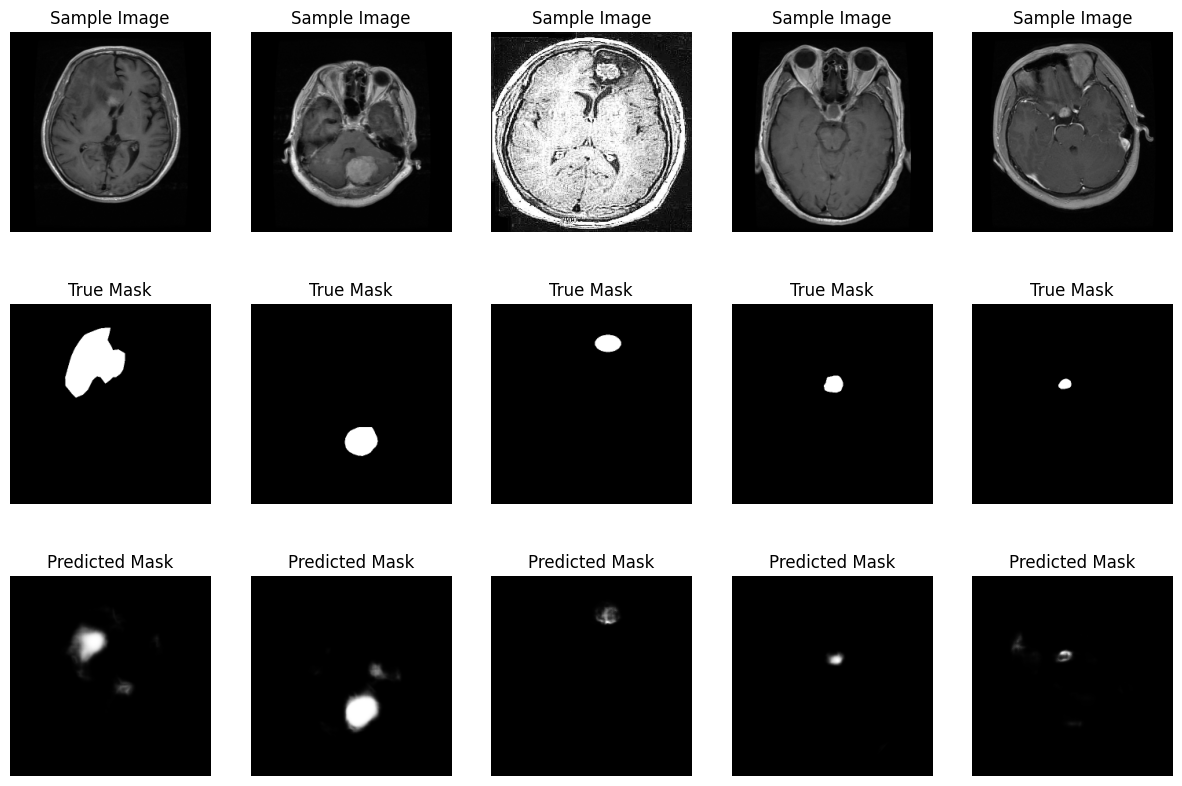

Sample 1: True Tumor: True, Predicted Tumor: True
Sample 2: True Tumor: True, Predicted Tumor: True
Sample 3: True Tumor: True, Predicted Tumor: True
Sample 4: True Tumor: True, Predicted Tumor: True
Sample 5: True Tumor: True, Predicted Tumor: True


In [45]:
sample_images = x_test[11:16]
sample_masks = y_test[11:16]

# Predict masks using the trained model
predicted_masks = res_unet_model.predict(sample_images)

# Visualize sample images and predicted masks
plt.figure(figsize=(15, 10))
for i in range(len(sample_images)):
    plt.subplot(3, len(sample_images), i+1)
    plt.imshow(sample_images[i].reshape(256, 256), cmap='gray')
    plt.title("Sample Image")
    plt.axis('off')

    plt.subplot(3, len(sample_images), i+1+len(sample_images))
    plt.imshow(sample_masks[i].reshape(256, 256), cmap='gray')
    plt.title("True Mask")
    plt.axis('off')

    plt.subplot(3, len(sample_images), i+1+2*len(sample_images))
    plt.imshow(predicted_masks[i].reshape(256, 256), cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.show()

# Check if tumor is detected
for i in range(len(sample_images)):
    true_tumor = np.any(sample_masks[i])
    predicted_tumor = np.any(predicted_masks[i])
    print(f"Sample {i+1}: True Tumor: {true_tumor}, Predicted Tumor: {predicted_tumor}")

Metrics:
Epoch 1: Train Loss: 0.1512, Val Loss: 63.4769, Train Acc: 0.9608, Val Acc: 0.0410
Epoch 2: Train Loss: 0.0990, Val Loss: 8.0431, Train Acc: 0.9681, Val Acc: 0.0880
Epoch 3: Train Loss: 0.0901, Val Loss: 7.0344, Train Acc: 0.9685, Val Acc: 0.1578
Epoch 4: Train Loss: 0.0819, Val Loss: 0.5818, Train Acc: 0.9700, Val Acc: 0.6804
Epoch 5: Train Loss: 0.0754, Val Loss: 1.1867, Train Acc: 0.9716, Val Acc: 0.6920
Epoch 6: Train Loss: 0.0705, Val Loss: 0.1176, Train Acc: 0.9728, Val Acc: 0.9614
Epoch 7: Train Loss: 0.0669, Val Loss: 0.1255, Train Acc: 0.9740, Val Acc: 0.9437
Epoch 8: Train Loss: 0.0617, Val Loss: 0.0781, Train Acc: 0.9751, Val Acc: 0.9702
Epoch 9: Train Loss: 0.0569, Val Loss: 0.0931, Train Acc: 0.9770, Val Acc: 0.9623
Epoch 10: Train Loss: 0.0567, Val Loss: 0.0985, Train Acc: 0.9764, Val Acc: 0.9565
Epoch 11: Train Loss: 0.0519, Val Loss: 0.0820, Train Acc: 0.9778, Val Acc: 0.9662
Epoch 12: Train Loss: 0.0491, Val Loss: 0.0706, Train Acc: 0.9783, Val Acc: 0.9706
Epo

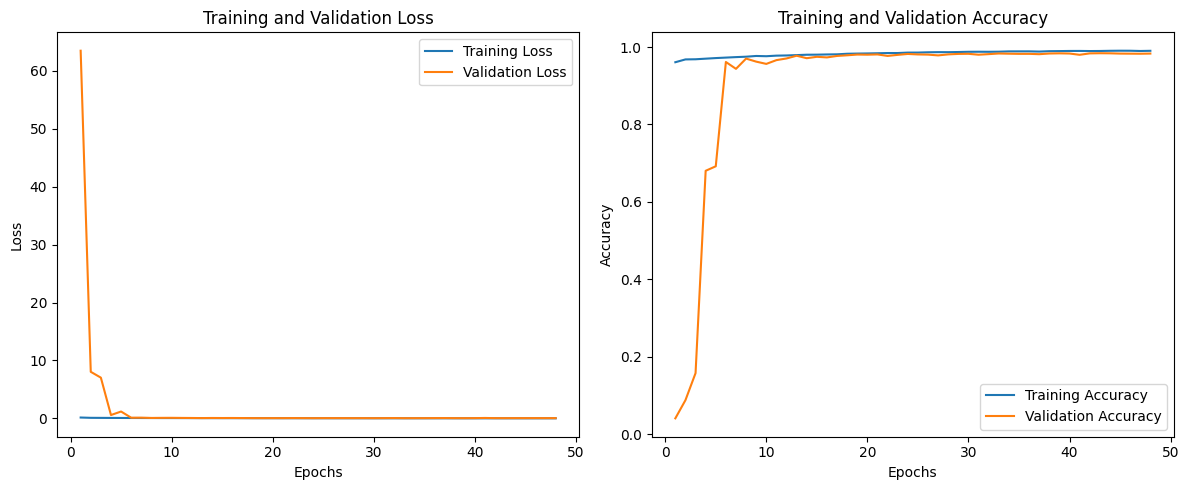

In [42]:
import matplotlib.pyplot as plt

# Get training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
dice_coefficient = history.history.get('dice_coefficient', [])  # Get dice coefficient if available

# Plot training loss and validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Print metrics
print("Metrics:")
for epoch, (train_loss, val_loss, train_acc, val_acc) in enumerate(zip(training_loss, validation_loss, training_accuracy, validation_accuracy), 1):
    print(f"Epoch {epoch}: Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")

# Print Dice coefficient
if dice_coefficient:
    print("\nDice Coefficient:")
    for epoch, dice in enumerate(dice_coefficient, 1):
        print(f"Epoch {epoch}: {dice}")

plt.tight_layout()
plt.show()


In [ ]:
def threshold(array):
    array=array.flatten()
    flat_array=list(map(lambda x :255 if x>0.5 else 0,array))
    flat_array=np.array(flat_array)
    th=flat_array.reshape(256,256)
    return th 
def combine_pred_original(path,dir_path=False,plot=False):
    if dir_path==False : 
        image=cv.imread(path)
        image=cv.resize(image,(256,256))

        image_gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

        image_1=image_gray / 255.0
        image_1= image_1.astype(np.float32)
        # plt.imshow(image,cmap='gray')

        image_1=image_1.reshape(-1,256,256,1)
        y_hat = res_unet_model.predict(image_1)

        y_hat=y_hat.reshape(256,256)
        mask=threshold(y_hat)
        finall_img=np.copy(image)
        index_mask=np.where(mask==255)
        finall_img[index_mask]=[0,0,255]
        finall_img=cv.resize(finall_img,(512,512))
        if plot==True : 
            plt.imshow(finall_img[:,:,::-1])
        return finall_img
    #     plt.imshow(image_gray,cmap='gray')
        
    else  :
        all_result={}
        all_img_name=os.listdir(path)
        image_count=len(all_img_name)
        if plot==True :
            rows,columns=15,ceil(image_count/3)
            fig = plt.figure(figsize=(15, 10))
        for c,name in enumerate(all_img_name) : 
            image=cv.imread(path+'/'+name)
            image=cv.resize(image,(256,256))

            image_gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)

            image_1=image_gray / 255.0
            image_1= image_1.astype(np.float32)
        # plt.imshow(image,cmap='gray')

            image_1=image_1.reshape(-1,256,256,1)
            y_hat = res_unet_model.predict(image_1)

            y_hat=y_hat.reshape(256,256)
            mask=threshold(y_hat)
            finall_img=np.copy(image)
            index_mask=np.where(mask==255)
            finall_img[index_mask]=[0,0,255]
            finall_img=cv.resize(finall_img,(512,512))
            all_result.update({name:finall_img})
            if plot==True :
                fig.add_subplot(rows, columns, c+1)
                plt.imshow(finall_img[:,:,::-1])
    
                plt.axis('off')
            
        return all_result
    
    

a=combine_pred_original(path='/kaggle/input/mri-brain-tumor-detection/sample_image_for test',dir_path=True,plot=True)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
No Tumor Detected
Tumor Detected
No Tumor Detected
Tumor Detected


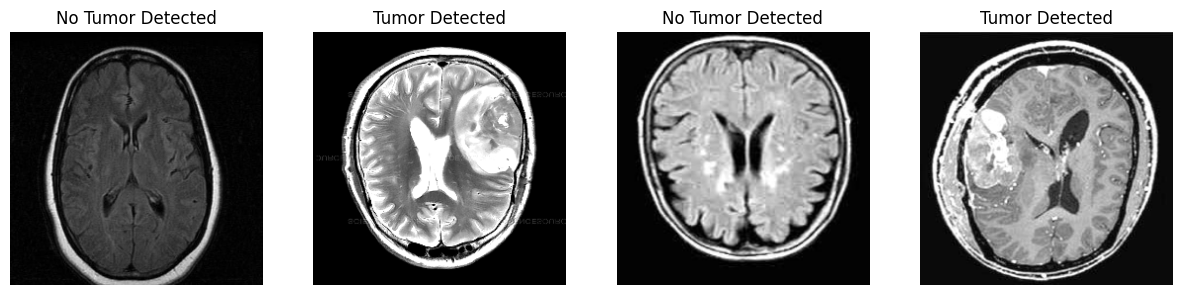

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_paths = ['/kaggle/input/mri-brain-tumor-detection/sample_image_for test/no571.jpg',
               '/kaggle/input/mri-brain-tumor-detection/sample_image_for test/y148.jpg',
               '/kaggle/input/mri-brain-tumor-detection/sample_image_for test/no575.jpg',
               '/kaggle/input/mri-brain-tumor-detection/sample_image_for test/y161.jpg',
               ]

sample_images = []
for image_path in image_paths:
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (256, 256))
    image = image / 255.0
    sample_images.append(image)
sample_images = np.array(sample_images)
sample_images = np.expand_dims(sample_images, axis=-1)
# Predict masks using the trained model
predicted_masks = res_unet_model.predict(sample_images)

threshold = 0.5 

for i, mask in enumerate(predicted_masks):
    tumor_area = np.sum(mask > threshold)
    if tumor_area > 0:
        print("Tumor Detected")
    else:
        print("No Tumor Detected")

plt.figure(figsize=(15, 5))
for i in range(len(sample_images)):
    plt.subplot(1, len(sample_images), i + 1)
    plt.imshow(sample_images[i].reshape(256, 256), cmap='gray')
    tumor_area = np.sum(predicted_masks[i] > threshold)
    if tumor_area > 0:
        plt.title("Tumor Detected")
    else:
        plt.title("No Tumor Detected")
    plt.axis('off')

plt.show()


In [74]:
res_unet_model.save("res_unet_model.h5")